In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
data=pd.read_csv('height-weight.csv')

In [6]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

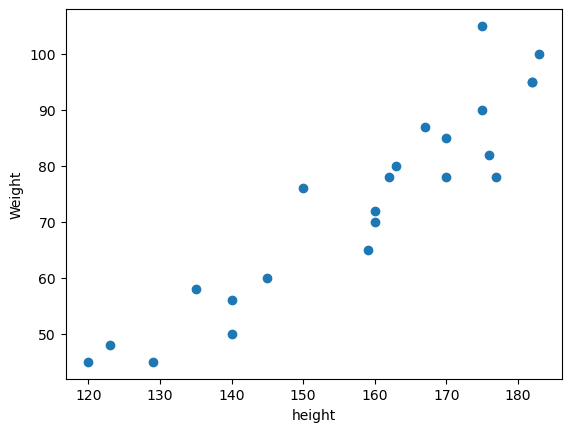

In [ ]:
plt.scatter(data['Height'],data['Weight']) # We are just ploting the data pointds to understand the data behivior.
plt.xlabel('height')
plt.ylabel('Weight')

In [9]:
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


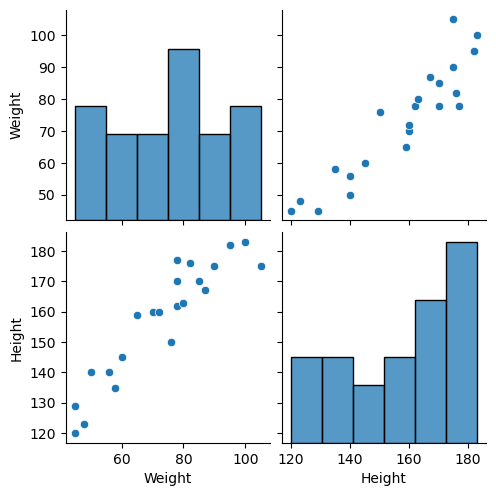

In [ ]:
import seaborn as sns  # To get the relation between all the feature , columns in data set 
sns.pairplot(data)

In [15]:
X=data[['Weight']]
y=data['Height']


In [16]:
X_series=data['Weight']
np.array(X_series).shape

(23,)

In [ ]:
# Just to check the shape of y , we can say the target variable  np = numPy ## WE ARE CHECKING TEH DIMENSION OD DATA

np.array(y).shape

(23,)

In [ ]:
## First STEPS : 1
# TO MACHINE LEARNING MODELING
# First we have to split the data into training and testing data

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 
# here we are splitting the data into training and testing data 80% training and 20% testing

In [ ]:
# Second STEP : 2
# Feature Scaling
# We have to scale the data because the data may have different range of values

from sklearn.preprocessing import StandardScaler

In [ ]:
# Learn the rules from Training_data and apply them
# Rule stored in scaler object

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) # Here we are fitting and transforming the training data

In [ ]:
X_test=scaler.transform(X_test) 

# We are only transforming the test data because we have already learned the rules from training data i.e; mean and standard deviation

In [ ]:
X_test # just to check the transformed test data

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [ ]:
# Third STEP : 3

## Applying Linear Regression Here The Model Algorithm Starts . 
# Here we are importing LinearRegression class from sklearn library

from sklearn.linear_model import LinearRegression 

In [ ]:
regression=LinearRegression(n_jobs=-1) # here we are creating the object of LinearRegression class

In [ ]:
regression.fit(X_train,y_train) # Here we are fitting the model on training data 

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope:",regression.coef_) # Here we are printing the coefficient or slope of the line
print("Intercept:",regression.intercept_) # Here we are printing the intercept of the line

Coefficient or slope: [17.03440872]
Intercept: 157.5


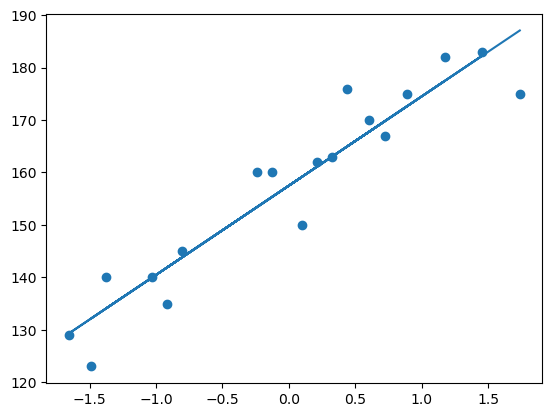

In [ ]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train) # Here we are ploting the training data points
plt.plot(X_train,regression.predict(X_train)) # Here we are ploting the best fit line on training data

In [ ]:
## NOW Prediction for test data
y_pred=regression.predict(X_test) # Here we are predicting the values for test data

In [ ]:
# Fourth STEP : 4
# WE are checking the performance of our model

## This is our Performance Metrics

# Here we are importing the performance metrics from sklearn library
# Here MAE and MSE are regression performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error 



In [ ]:
mse=mean_squared_error(y_test,y_pred) # Here we are calculating the Mean Squared Error
mae=mean_absolute_error(y_test,y_pred) # Here we are calculating the Mean Absolute Error
rmse=np.sqrt(mse) # Here we are calculating the Root Mean Squared Error
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [ ]:
from sklearn.metrics import r2_score # Here we are importing r2_score from sklearn library to calculate R squared value 

In [35]:
score=r2_score(y_test,y_pred)
print(score)

0.7769869860423441


In [37]:
# here we are calculating the Adjusted R squared value for multiple linear regression
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [ ]:
# Here we are importing statsmodels library to build the OLS model for statistical summary
# OLS is in statsmodels, which is used for statistical analysis
import statsmodels.api as sm 

In [ ]:
# Here we are fitting the OLS model on training data, So we can get the statistical summary of the model
model=sm.OLS(y_train,X_train).fit() 

In [ ]:
# Here we are predicting the values for test data using OLS model

prediction=model.predict(X_test) 
print(prediction)


[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [ ]:
print(model.summary()) # Here we are printing the statistical summary of the model

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sat, 20 Dec 2025   Prob (F-statistic):                       0.661
Time:                        16:58:22   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Applications/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])

In [47]:
regression.predict(scaler.transform([[0]]))

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([85.96709053])

In [ ]:
# Prediction(Y) = (m × X) + b = b ; For X=0 , Still the Vlaue of Y is b